# 例題11.3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, KMeans

In [2]:
iris = load_iris()
X = iris.data[:,0:2]

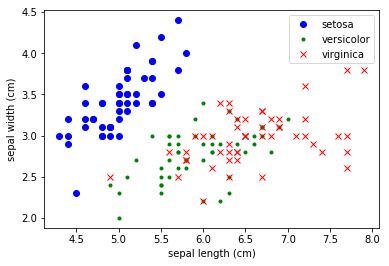

In [3]:
y = iris.target
co = ['bo', 'g.', 'rx'] 
for t, c in zip(set(iris.target), co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names)

In [4]:
ac = AgglomerativeClustering(n_clusters=3)
print(ac)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x000001BC17E1A8C8>)


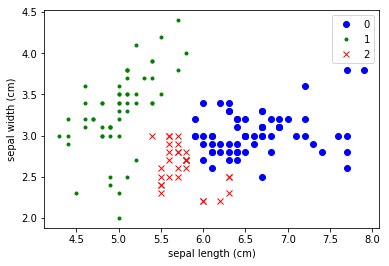

In [5]:
ac.fit(X)
y2 = ac.labels_
for t, c in zip(set(ac.labels_), co):
    plt.plot(X[y2==t,0], X[y2==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(set(ac.labels_))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


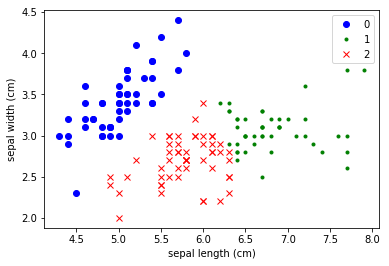

In [6]:
km = KMeans(n_clusters = 3)
print(km)
km.fit(X)
y3 = km.labels_
for t, c in zip(set(km.labels_), co):
    plt.plot(X[y3==t,0], X[y3==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(set(km.labels_))

## 例題11.5

In [7]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()
ap.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [8]:
ap.cluster_centers_indices_

array([  2,  17,  33,  52,  57,  87,  94,  97, 115, 117, 130], dtype=int64)

In [9]:
ap = AffinityPropagation(preference=-10)
ap.fit(X)
ap.cluster_centers_indices_

array([ 26,  89, 103, 105], dtype=int64)

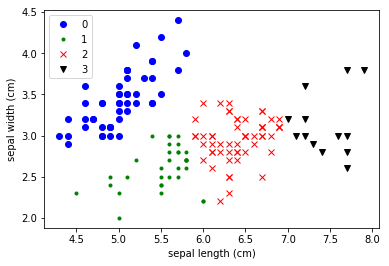

In [10]:
y4 = ap.labels_
co = ['bo', 'g.', 'rx', 'kv'] 
for t, c in zip(set(ap.labels_), co):
    plt.plot(X[y4==t,0], X[y4==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(set(ap.labels_))

## 例題11.7

In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
print('means')
print(gmm.means_)
print('covariances:')
print(gmm.covariances_)

means
[[5.01493896 3.4404862 ]
 [6.6814044  3.0285628 ]
 [5.90114537 2.74385294]]
covariances:
[[[0.1194876  0.08969867]
  [0.08969867 0.12147459]]

 [[0.36087007 0.05158991]
  [0.05158991 0.08923683]]

 [[0.27544608 0.08866062]
  [0.08866062 0.09382524]]]


Text(0.5,1,'GMM')

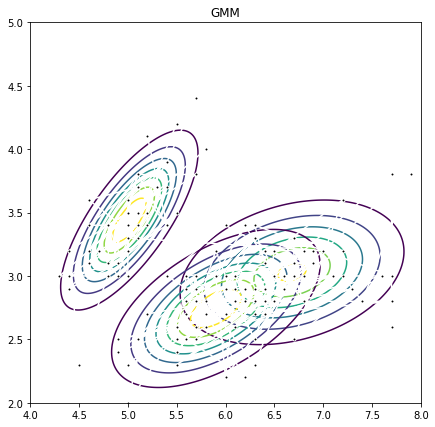

In [13]:
import scipy as sp
fig = plt.figure(figsize=(7, 7))  #Figureのインスタンス生成
ax = fig.add_subplot(1, 1, 1)     #Axesのインスタンス生成
ax.plot(X[:, 0], X[:, 1], 'w', markerfacecolor='k', marker='.')
x1, x2 = np.mgrid[4:8:.01, 2:5:.01]
plt.xlim([4,8]) 
plt.ylim([2,5]) 
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1
pos[:, :, 1] = x2
n0 = sp.stats.multivariate_normal(gmm.means_[0], gmm.covariances_[0])
n1 = sp.stats.multivariate_normal(gmm.means_[1], gmm.covariances_[1])
n2 = sp.stats.multivariate_normal(gmm.means_[2], gmm.covariances_[2])
ax.contour(x1, x2, n0.pdf(pos))
ax.contour(x1, x2, n1.pdf(pos))
ax.contour(x1, x2, n2.pdf(pos))
ax.set_title('GMM')